# EDA

---

### Importing the libraries

In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import os

### Importing dataset

In [6]:
cwd = os.getcwd()
df = pd.read_csv("customer_booking.csv",encoding="ISO-8859-1")
df.head(10)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
5,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
6,3,Internet,RoundTrip,201,33,6,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
7,2,Internet,RoundTrip,238,19,14,Mon,AKLDEL,India,1,0,1,5.52,0
8,1,Internet,RoundTrip,80,22,4,Mon,AKLDEL,New Zealand,0,0,1,5.52,0
9,1,Mobile,RoundTrip,378,30,12,Sun,AKLDEL,India,0,0,0,5.52,0


In [7]:
df.shape

(50000, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [9]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [10]:
mapping = {
    "Mon":1,
    "Tue":2,
    "Wed":3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7
}
df['flight_day'] = df['flight_day'].map(mapping)
df['flight_day'].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [11]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [13]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [16]:
df['sales_channel'].value_counts()

sales_channel
Internet    44382
Mobile       5618
Name: count, dtype: int64

### Percentage of Booking type 

In [19]:
internet_booking = (df['sales_channel'].value_counts()[0]) / len(df) * 100
phone_booking = (df['sales_channel'].value_counts()[1]) / len(df) * 100

In [21]:
print(f"Number of booking done through internet: {internet_booking}")
print(f"Number of booking done through phone call: {phone_booking}")

Number of booking done through internet: 88.764
Number of booking done through phone call: 11.236


In [25]:
df.value_counts()

num_passengers  sales_channel  trip_type  purchase_lead  length_of_stay  flight_hour  flight_day  route   booking_origin  wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  flight_duration  booking_complete
3               Mobile         RoundTrip  37             18              4            2           HNDTRZ  Japan           1                    0                     0                      7.57             0                   11
1               Mobile         RoundTrip  199            6               18           1           IKASZX  China           0                    0                     0                      8.15             0                    9
2               Mobile         RoundTrip  29             6               6            4           DPSPVG  China           1                    1                     1                      5.33             0                    8
1               Mobile         RoundTrip  98             36              13           1       

### Percentage of Trip Type

In [24]:
df['trip_type'].value_counts()

trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: count, dtype: int64

In [26]:
per_round = (df['trip_type'].value_counts()[0]) / len(df) * 100
per_oneway = (df['trip_type'].value_counts()[1]) / len(df) * 100
per_cycle = (df['trip_type'].value_counts()[2]) / len(df) * 100

In [28]:

print(f"Percentage of round trips: {per_round}")
print(f"Percentage of one way trips: {per_oneway}")
print(f"Percentage of circle trips: {per_cycle}")

Percentage of round trips: 98.994
Percentage of one way trips: 0.774
Percentage of circle trips: 0.232


In [29]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [32]:
df['num_passengers'].value_counts()

num_passengers
1    31352
2    12804
3     2941
4     1784
5      561
6      289
7      114
8       89
9       66
Name: count, dtype: int64

### Majority number of passengers

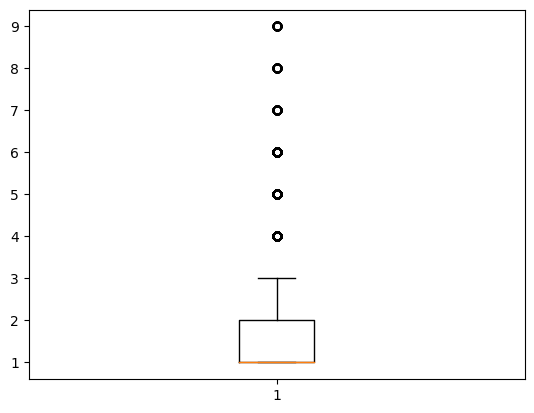

In [35]:
plt.boxplot(df['num_passengers'])

plt.show()

### Purchase Lead v/s Total Count 

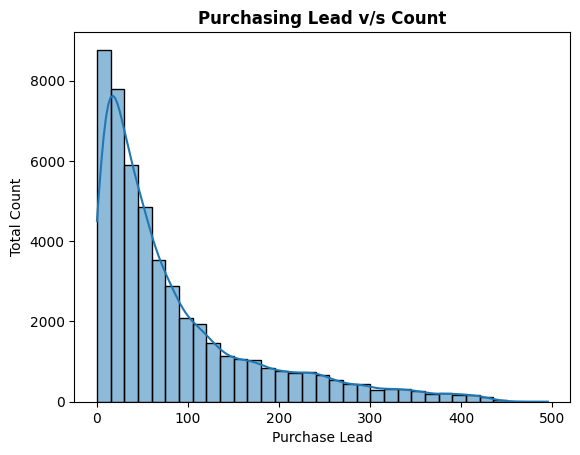

In [53]:
sns.histplot(data=df,x='purchase_lead',binwidth=15,kde=True)
plt.xlabel('Purchase Lead')
plt.ylabel('Total Count')
plt.title('Purchasing Lead v/s Count',fontweight='bold')
plt.show()

In [42]:
(df.purchase_lead > 500).value_counts()

purchase_lead
False    49982
True        18
Name: count, dtype: int64

In [43]:
df= df[df['purchase_lead']<500]

### Length of stay v/s Total Count

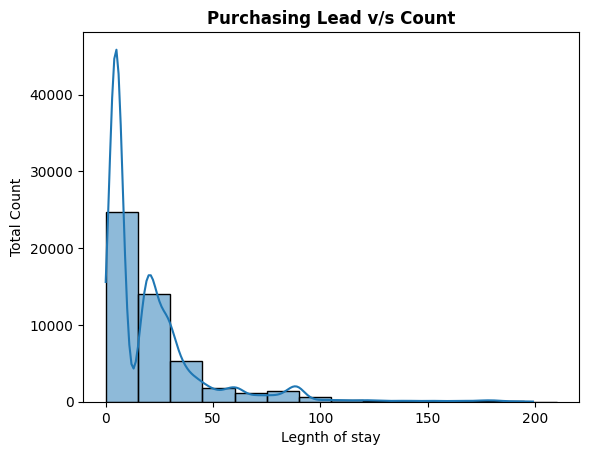

In [54]:
sns.histplot(data=df,x='length_of_stay',binwidth=15,kde=True)
plt.xlabel('Legnth of stay')
plt.ylabel('Total Count')
plt.title('Purchasing Lead v/s Count',fontweight='bold')
plt.show()

In [49]:
(df.length_of_stay > 200).value_counts()

length_of_stay
False    49703
True       279
Name: count, dtype: int64

In [50]:
df= df[df['length_of_stay']<200]

### Top 20 Countries to books tickets/


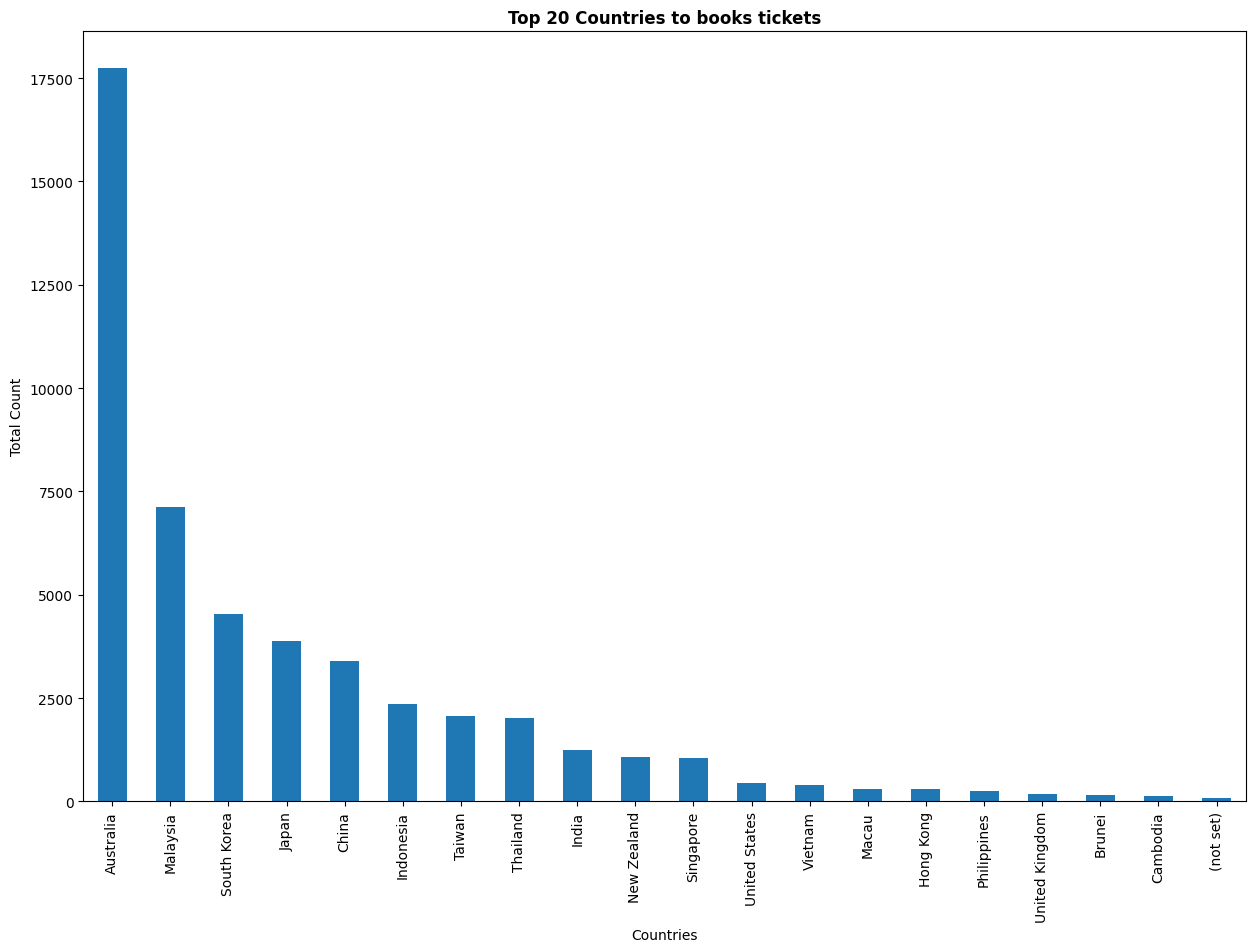

In [55]:
plt.figure(figsize=(15,10))
ax = df.booking_origin.value_counts() [:20].plot(kind='bar')
ax.set_title("Top 20 Countries to books tickets",fontweight='bold')
ax.set_xlabel("Countries")
ax.set_ylabel("Total Count")
plt.show()

### Top 20 Countries to Complete the booking

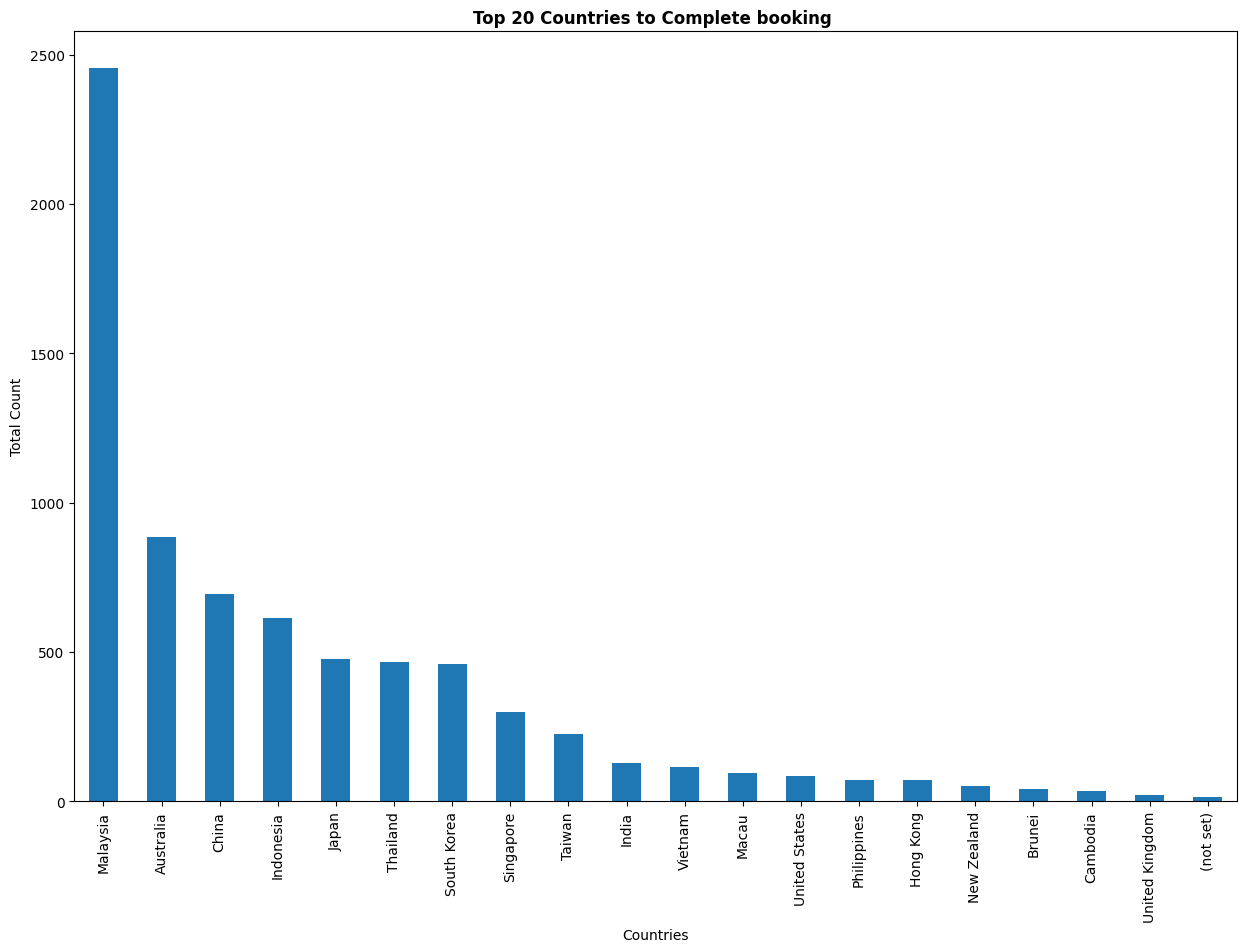

In [71]:
complete_book = df[df.booking_complete == 1]

plt.figure(figsize=(15,10))
ax = complete_book.booking_origin.value_counts() [:20].plot(kind='bar')
ax.set_title("Top 20 Countries to Complete booking ",fontweight='bold')
ax.set_xlabel("Countries")
ax.set_ylabel("Total Count")
plt.show()